In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [25]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [26]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [27]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20e217cb514dad88c5f2193ccb93c750


In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | lalibela
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | richards bay
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | xam nua
Processing Record 8 of Set 1 | salalah
Processing Record 9 of Set 1 | xichang
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | rio grande
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | dong hoi
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | barrow
Processing Record 23 of Set 1 | dunedin

Processing Record 39 of Set 4 | kruisfontein
Processing Record 40 of Set 4 | agirish
Processing Record 41 of Set 4 | saleaula
City not found. Skipping...
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | palasa
Processing Record 44 of Set 4 | leningradskiy
Processing Record 45 of Set 4 | airai
Processing Record 46 of Set 4 | vostok
Processing Record 47 of Set 4 | batticaloa
Processing Record 48 of Set 4 | mareeba
Processing Record 49 of Set 4 | pilar
Processing Record 50 of Set 4 | harstad
Processing Record 1 of Set 5 | newton
Processing Record 2 of Set 5 | concepcion
Processing Record 3 of Set 5 | craig
Processing Record 4 of Set 5 | verkh-usugli
Processing Record 5 of Set 5 | yulara
Processing Record 6 of Set 5 | bertoua
Processing Record 7 of Set 5 | mecca
Processing Record 8 of Set 5 | omboue
Processing Record 9 of Set 5 | cabo san lucas
Processing Record 10 of Set 5 | vardo
Processing Record 11 of Set 5 | ruatoria
City not found. Skipping...
Processing 

Processing Record 33 of Set 8 | piney green
Processing Record 34 of Set 8 | saint anthony
Processing Record 35 of Set 8 | chifeng
Processing Record 36 of Set 8 | baoying
Processing Record 37 of Set 8 | nabire
Processing Record 38 of Set 8 | neuquen
Processing Record 39 of Set 8 | muros
Processing Record 40 of Set 8 | grindavik
Processing Record 41 of Set 8 | mahanoro
Processing Record 42 of Set 8 | bahia blanca
Processing Record 43 of Set 8 | bondo
Processing Record 44 of Set 8 | qeshm
Processing Record 45 of Set 8 | bonnyville
Processing Record 46 of Set 8 | jiddah
City not found. Skipping...
Processing Record 47 of Set 8 | paita
Processing Record 48 of Set 8 | miguel hidalgo
Processing Record 49 of Set 8 | lompoc
Processing Record 50 of Set 8 | otradnoye
Processing Record 1 of Set 9 | bhadasar
Processing Record 2 of Set 9 | mao
Processing Record 3 of Set 9 | buariki
City not found. Skipping...
Processing Record 4 of Set 9 | warqla
City not found. Skipping...
Processing Record 5 of Se

Processing Record 17 of Set 12 | gualaquiza
Processing Record 18 of Set 12 | meulaboh
Processing Record 19 of Set 12 | bowen
Processing Record 20 of Set 12 | riyadh
Processing Record 21 of Set 12 | merauke
Processing Record 22 of Set 12 | pedro juan caballero
Processing Record 23 of Set 12 | westport
Processing Record 24 of Set 12 | skibbereen
Processing Record 25 of Set 12 | gizo
Processing Record 26 of Set 12 | fare
Processing Record 27 of Set 12 | letychiv
Processing Record 28 of Set 12 | jasper
Processing Record 29 of Set 12 | suez
Processing Record 30 of Set 12 | vranje
Processing Record 31 of Set 12 | bari
Processing Record 32 of Set 12 | sikea
City not found. Skipping...
Processing Record 33 of Set 12 | gairo
Processing Record 34 of Set 12 | tevriz
Processing Record 35 of Set 12 | maragogi
Processing Record 36 of Set 12 | hurghada
Processing Record 37 of Set 12 | seydi
Processing Record 38 of Set 12 | gat
Processing Record 39 of Set 12 | labrea
Processing Record 40 of Set 12 | l

In [29]:
len(city_data)


576

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,59.27,73,52,4.00,ZA,2021-11-08 02:03:04
1,Ushuaia,-54.8000,-68.3000,34.90,91,37,4.38,AR,2021-11-08 02:01:34
2,Lalibela,12.0333,39.0333,57.20,53,91,2.77,ET,2021-11-08 02:03:04
3,Butaritari,3.0707,172.7902,82.24,68,5,11.74,KI,2021-11-08 02:00:39
4,Richards Bay,-28.7830,32.0377,70.39,95,100,3.56,ZA,2021-11-08 02:03:05
5,Rikitea,-23.1203,-134.9692,74.97,78,100,13.85,PF,2021-11-08 02:01:05
6,Xam Nua,20.4197,104.0439,60.75,99,100,3.58,LA,2021-11-08 02:03:06
7,Salalah,17.0151,54.0924,74.39,70,7,3.36,OM,2021-11-08 01:59:22
8,Xichang,27.8964,102.2634,45.88,72,98,2.84,CN,2021-11-08 02:03:06
9,Broken Hill,-31.9500,141.4333,70.59,37,100,8.39,AU,2021-11-08 02:03:07


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


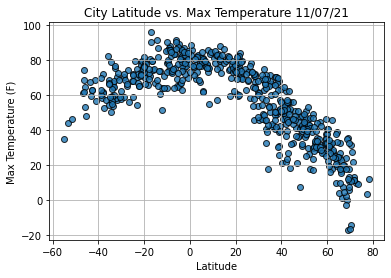

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

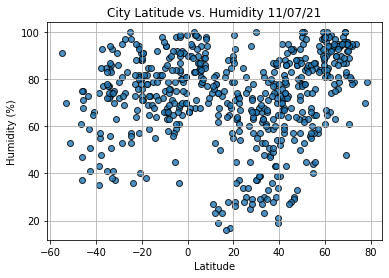

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

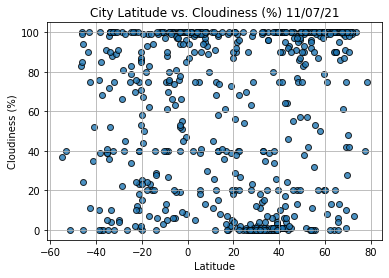

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

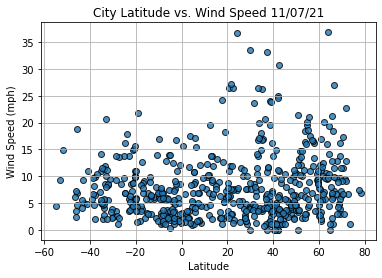

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [54]:
from scipy.stats import linregress
import matplotlib.pyplot as plt



In [55]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [56]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Lalibela,12.0333,39.0333,57.20,53,91,2.77,ET,2021-11-08 02:03:04
3,Butaritari,3.0707,172.7902,82.24,68,5,11.74,KI,2021-11-08 02:00:39
6,Xam Nua,20.4197,104.0439,60.75,99,100,3.58,LA,2021-11-08 02:03:06
7,Salalah,17.0151,54.0924,74.39,70,7,3.36,OM,2021-11-08 01:59:22
8,Xichang,27.8964,102.2634,45.88,72,98,2.84,CN,2021-11-08 02:03:06
...,...,...,...,...,...,...,...,...,...
567,Baglung,28.2719,83.5898,57.97,66,23,3.47,NP,2021-11-08 02:18:59
568,Adrar,20.5022,-10.0711,69.40,26,100,6.31,MR,2021-11-08 02:19:00
570,Matagami,49.7502,-77.6328,44.71,100,90,4.61,CA,2021-11-08 02:18:19
571,Jizan,17.3333,42.6667,81.54,64,0,2.26,SA,2021-11-08 02:19:01


In [57]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

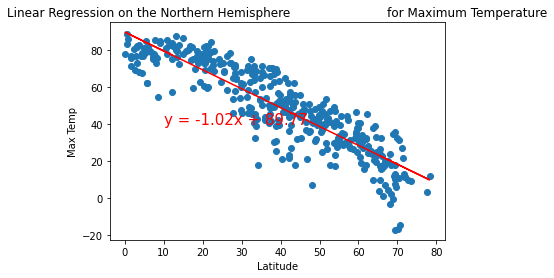

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

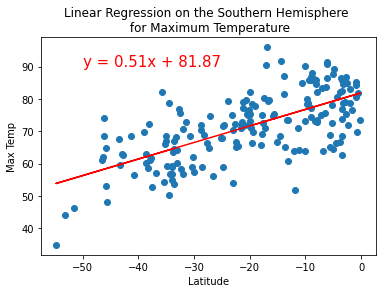

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

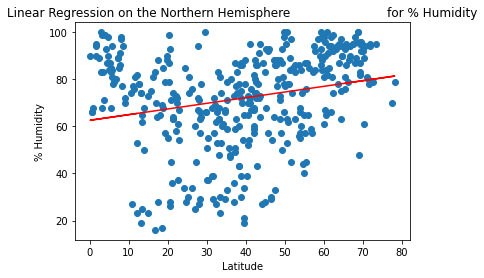

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

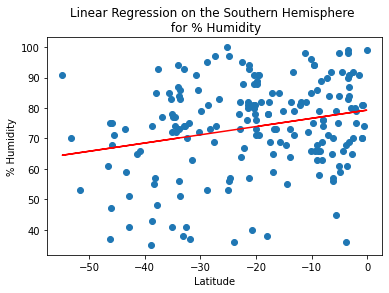

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

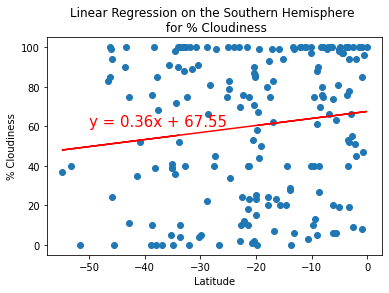

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

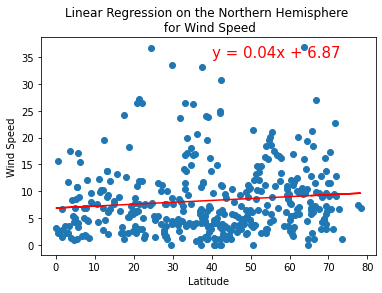

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

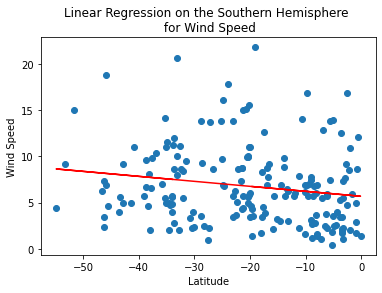

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [73]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests

In [75]:


# Import the API key.
from config import g_key

ImportError: cannot import name 'g_key' from 'config' (/Users/root1/Desktop/Data Analytics Boot Camp/Module 6 WeatherPy with Python APIs/github/World_Weather_Analysis/config.py)